In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('C:/Anaconda/Lib/ab_test_data.csv')
df.head()
df.info()
df.columns
df['test_group'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     19998 non-null  object
 1   timestamp   19998 non-null  object
 2   test_group  19998 non-null  object
 3   conversion  19998 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 625.1+ KB


test_group
a    10013
b     9985
Name: count, dtype: int64

In [21]:
df.groupby('test_group')['conversion'].sum()

test_group
a    611
b    889
Name: conversion, dtype: int64

In [27]:
conversion_rate = df.groupby('test_group')['conversion'].mean() * 100

In [29]:
conversion_rate

test_group
a    6.102067
b    8.903355
Name: conversion, dtype: float64

In [37]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()
test_duration = (end_date - start_date).days

In [53]:
print(f"Дата початку тесту {start_date}")
print(f"Дата закінчення тесту {end_date}")
print(F"Тривалість тесту:{test_duration}")

Дата початку тесту 2023-07-03 01:42:34.033708
Дата закінчення тесту 2023-07-25 01:41:19.152664
Тривалість тесту:21


In [83]:
group_counts = df['test_group'].value_counts()
n_A = group_counts['a']
n_B = group_counts['b']
conversion = df.groupby('test_group')['conversion'].sum()
conv_A = conversion['a']
conv_B = conversion['b']
successes = np.array([conv_B, conv_A])
samples = np.array([n_B, n_A])

In [85]:
from statsmodels.stats.proportion import proportions_ztest

# Виконуємо тест
stat, p_value = proportions_ztest(successes, samples)

print(f"Z-статистика: {stat}")
print(f"P-value: {p_value}")

Z-статистика: 7.519675939906207
P-value: 5.491217728445103e-14


C:\Temp\ipykernel_10620\2549862344.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Group', y='Conversion Rate', data = plot_df,


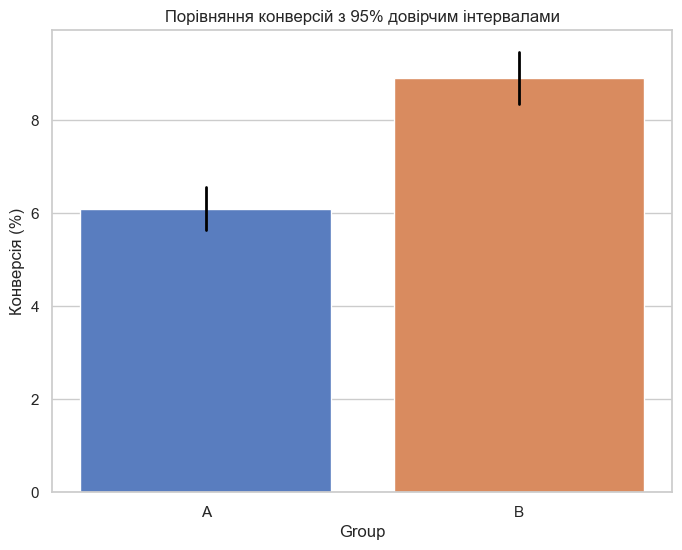

In [129]:
import scipy.stats as stats
sns.set(style='whitegrid')

conf_int_A = stats.binom.interval(0.95, n_A, conv_A/n_A, loc = 0)
conf_int_B = stats.binom.interval(0.95, n_B, conv_B/n_B, loc = 0)

conf_int_A = [x / n_A * 100 for x in conf_int_A]
conf_int_B = [x / n_B * 100 for x in conf_int_B]

data = {
    'Group':['A', 'B'],
    'Conversion Rate':[conv_A/n_A * 100, conv_B/n_B * 100],
    'Lower CI':[conf_int_A[0],conf_int_B[0]],
    'Upper CI':[conf_int_A[1],conf_int_B[1]]
}

plot_df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Group', y='Conversion Rate', data = plot_df,
palette = 'muted',errorbar=None)

for idx, row in plot_df.iterrows():
    plt.plot([idx,idx], [row['Lower CI'], row['Upper CI']],
color = 'black',linewidth=2)

plt.title('Порівняння конверсій з 95% довірчим інтервалами')
plt.ylabel('Конверсія (%)')
plt.show()
